# In this notebook we explore univariate, bivariate and multivariate visualization for EDA

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [163]:
data = pd.read_csv("used_cars.csv")


## 1. Observing data

In [164]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [165]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## 2. Data Cleaning

In [167]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [168]:
# getting the number of missing values in each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [169]:
# getting the percentage of missing values in each column
data.isnull().sum()/len(data)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

## 3. Data Reduction

In [170]:
# dropping columns that are unnecessary ex: S.No.
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


## 4. Feature engineering

In [171]:
# identifying the age of cars based on the manufactured year given by 'Year'
from datetime import date
y = date.today().year
data['Car_Age']= y- data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [172]:
# seperate brand and model as different features for better understanding
data['Brand'] = data['Name'].str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [173]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


## 5. More Wrangling

In [174]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [175]:
# Correcting ISUZU --> Isuzu, mini --> Mini Cooper and Land --> Land Rover
faultyentries = ['ISUZU','Mini','Land']
faultyentries = '|'.join(faultyentries)
data[data.Brand.str.contains(faultyentries)].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible


In [176]:
data['Brand']= data['Brand'].replace({'IZUZU':'Isuzu','Mini':'Mini Cooper', 'Land': 'Land Rover'})
data[data.Brand.str.contains(faultyentries)].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land Rover,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land Rover,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini Cooper,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land Rover,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini Cooper,CooperConvertible


In [177]:
# Convert to int --> engine power, new_price (some entries are in Cr and requires conversion to Lakh by multiplying by 100)
data['New_Price_in'] = data.New_Price.str.split().str.get(1)
data['New_Price'] = data.New_Price.str.split().str.get(0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,New_Price_in
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,WagonR,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta1.6,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,13,Honda,JazzV,Lakh
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,ErtigaVDI,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4New,NaN


In [178]:
# Drop entries with no New_Price (NaN)
data = data.dropna(subset = ['New_Price'])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,New_Price_in
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,13,Honda,JazzV,Lakh
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21,17.50,8,Toyota,InnovaCrysta,Lakh
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65,9.95,6,Maruti,CiazZeta,Lakh
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01,15.00,10,Mitsubishi,PajeroSport,Lakh
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87,18.55,10,BMW,3Series,Lakh


In [179]:
# Convert new price to astype int
data['New_Price'] = data['New_Price'].astype(float)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,New_Price_in
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,13,Honda,JazzV,Lakh
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50,8,Toyota,InnovaCrysta,Lakh
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65,9.95,6,Maruti,CiazZeta,Lakh
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01,15.00,10,Mitsubishi,PajeroSport,Lakh
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87,18.55,10,BMW,3Series,Lakh


In [180]:
# Convert Cr to Lakhs 
data[data['New_Price_in'].str.contains('Cr')].head(5)
data.loc[data['New_Price_in'].str.contains('Cr'), 'New_Price'] = data[data['New_Price_in'].str.contains('Cr')].New_Price* 100 
# data.loc[data['New_Price_in'].str.contains('Cr'), 'New_Price'] *=100
data.loc[data['New_Price_in'].str.contains('Cr'), 'New_Price_in'] = 'Lakh'
print(data.New_Price_in.unique())
data = data.drop(['New_Price_in'], axis =1)

['Lakh']


In [181]:
# Convert power to float
data['Power'] = data.Power.str.split().str.get(0).astype(float)
data['Mileage'] = data.Mileage.str.split().str.get(0).astype(float)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.70,5.0,8.61,4.50,13,Honda,JazzV
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755 CC,171.50,8.0,21.00,17.50,8,Toyota,InnovaCrysta
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462 CC,103.25,5.0,10.65,9.95,6,Maruti,CiazZeta
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477 CC,175.56,7.0,32.01,15.00,10,Mitsubishi,PajeroSport
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995 CC,190.00,5.0,47.87,18.55,10,BMW,3Series


In [182]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1006.0,2015.882704,2.339826,2001.00,2015.000,2017.00,2017.0000,2019.00
Kilometers_Driven,1006.0,40195.458250,28443.143991,600.00,20300.000,34639.50,54000.0000,215000.00
Mileage,1005.0,19.614090,4.525260,0.00,16.770,19.60,22.6900,33.54
Power,1006.0,119.222346,57.053269,41.00,81.800,98.96,155.0000,616.00
Seats,1006.0,5.298211,0.794594,2.00,5.000,5.00,5.0000,8.00
New_Price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,824.0,13.646820,14.851525,0.70,5.000,8.20,17.5000,160.00
Car_Age,1006.0,8.117296,2.339826,5.00,7.000,7.00,9.0000,23.00


## 6. Basic Statistical Sumary

- The manufacturing year of cars listed range from 2001 to 2019
- The average km driven is 40 000 kms (good to check for outliers)
- Max power is 616 and should be checked for outliers
- Max price of a used car is 160 Lakhs with a min of 0.7 Lakhs
- The average number of seats is 5.29

## 7. Seperating numerical and categoriacal variables

In [183]:
cat_columns = data.select_dtypes(include=['object']).columns
num_columns = data.select_dtypes(include=np.number).columns.tolist()
print(cat_columns)
print(num_columns)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine',
       'Brand', 'Model'],
      dtype='object')
['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Age']


## 8. Univariate Analysis

### 8.1 Plotting numerical variables 

Year
Skew : -1.38


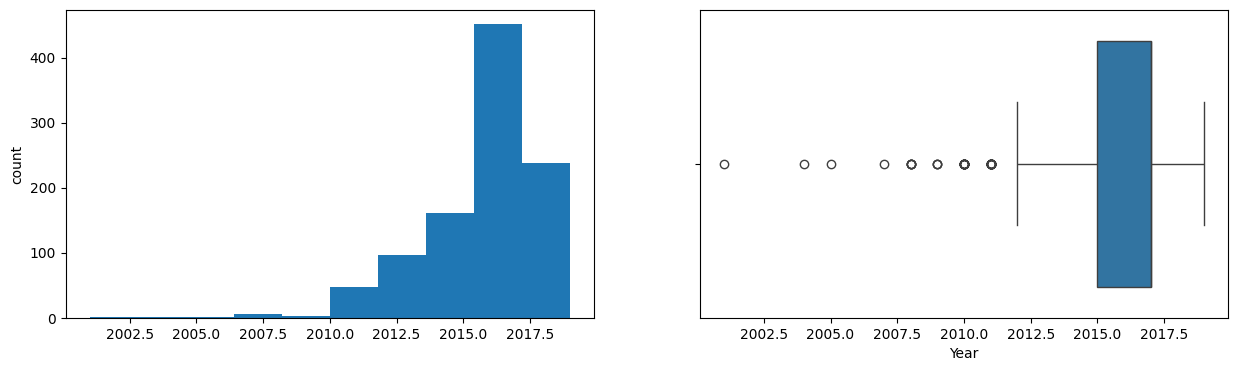

Kilometers_Driven
Skew : 1.47


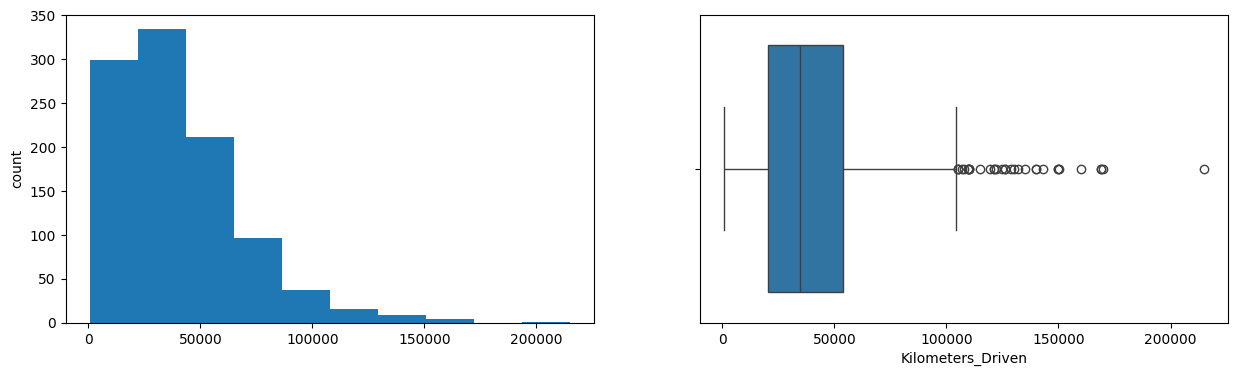

Mileage
Skew : -0.16


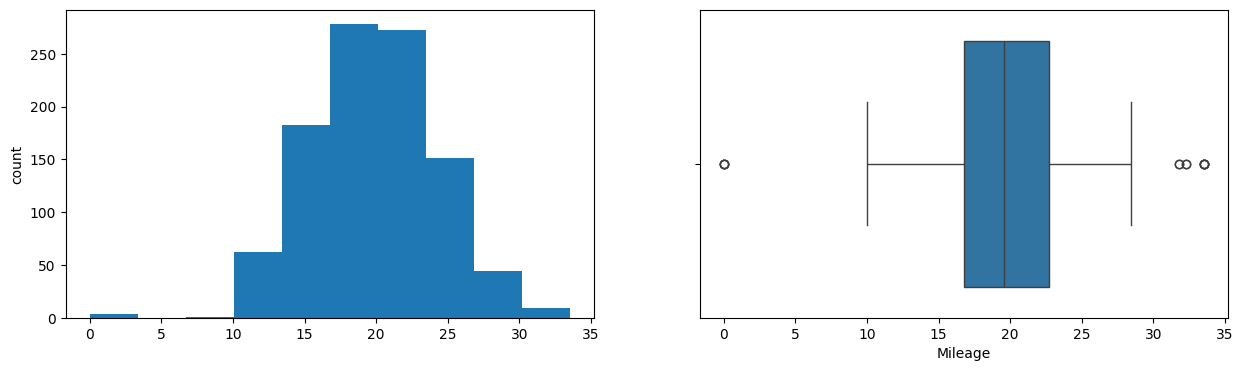

Power
Skew : 2.06


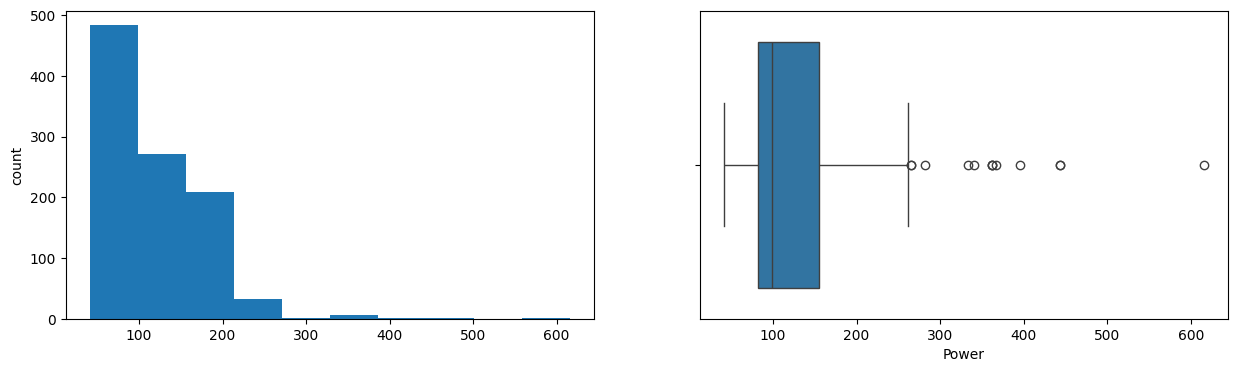

Seats
Skew : 1.49


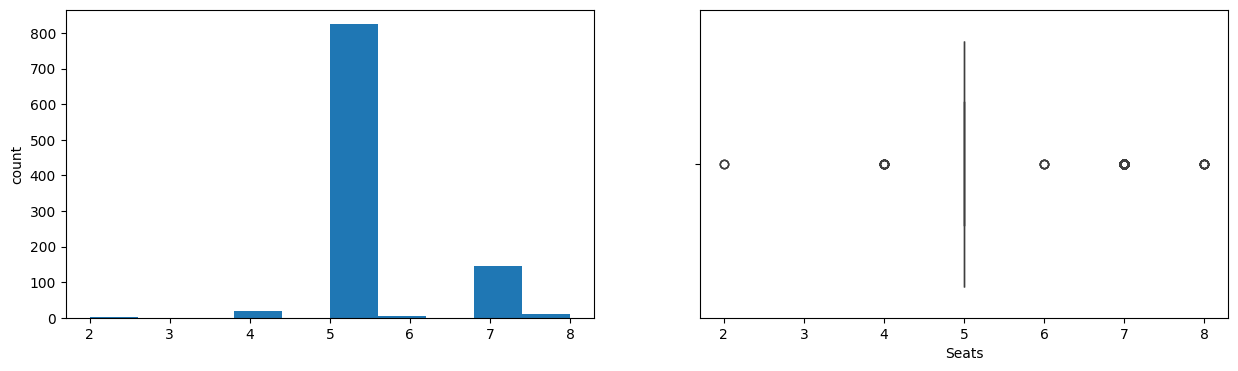

New_Price
Skew : 4.13


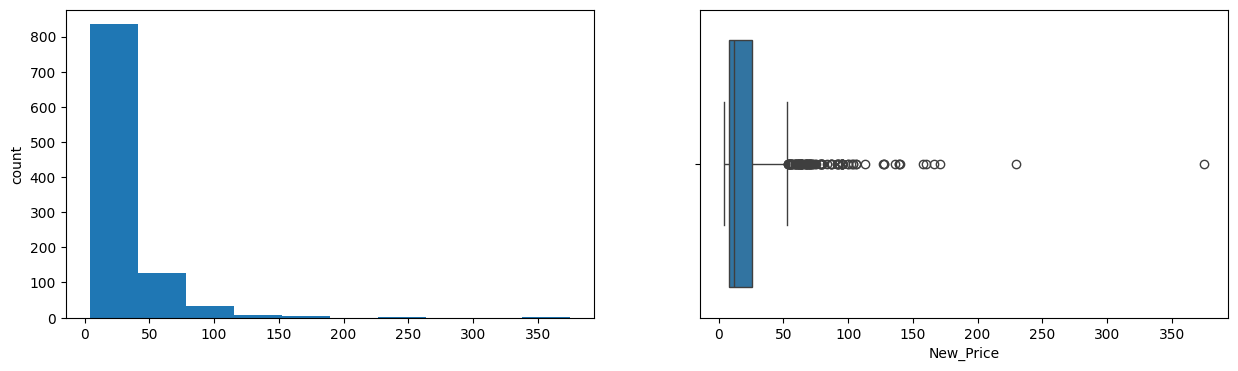

Price
Skew : 3.12


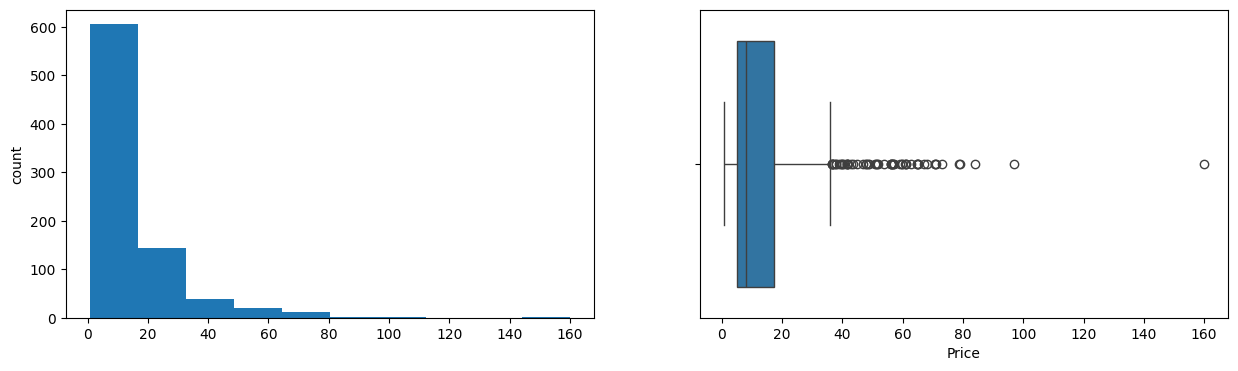

Car_Age
Skew : 1.38


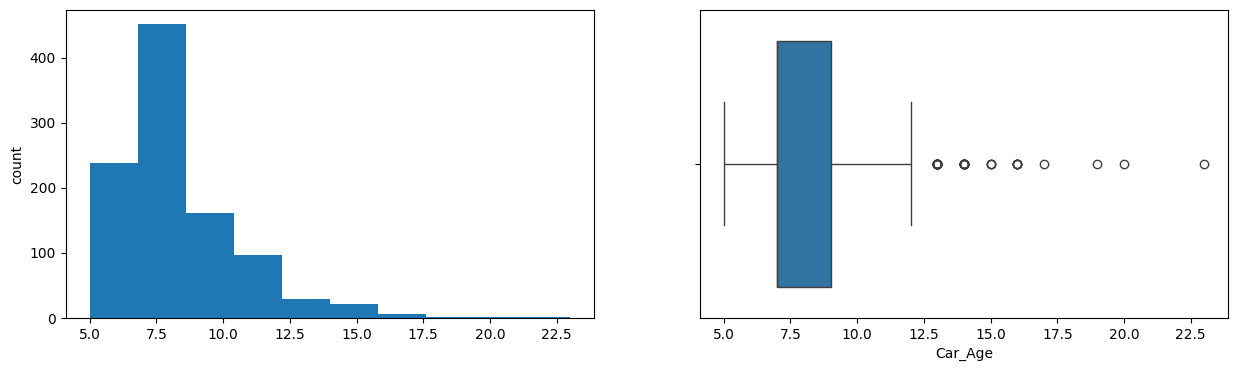

In [184]:
for col in num_columns:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

### 8.2 Plotting categorial variables

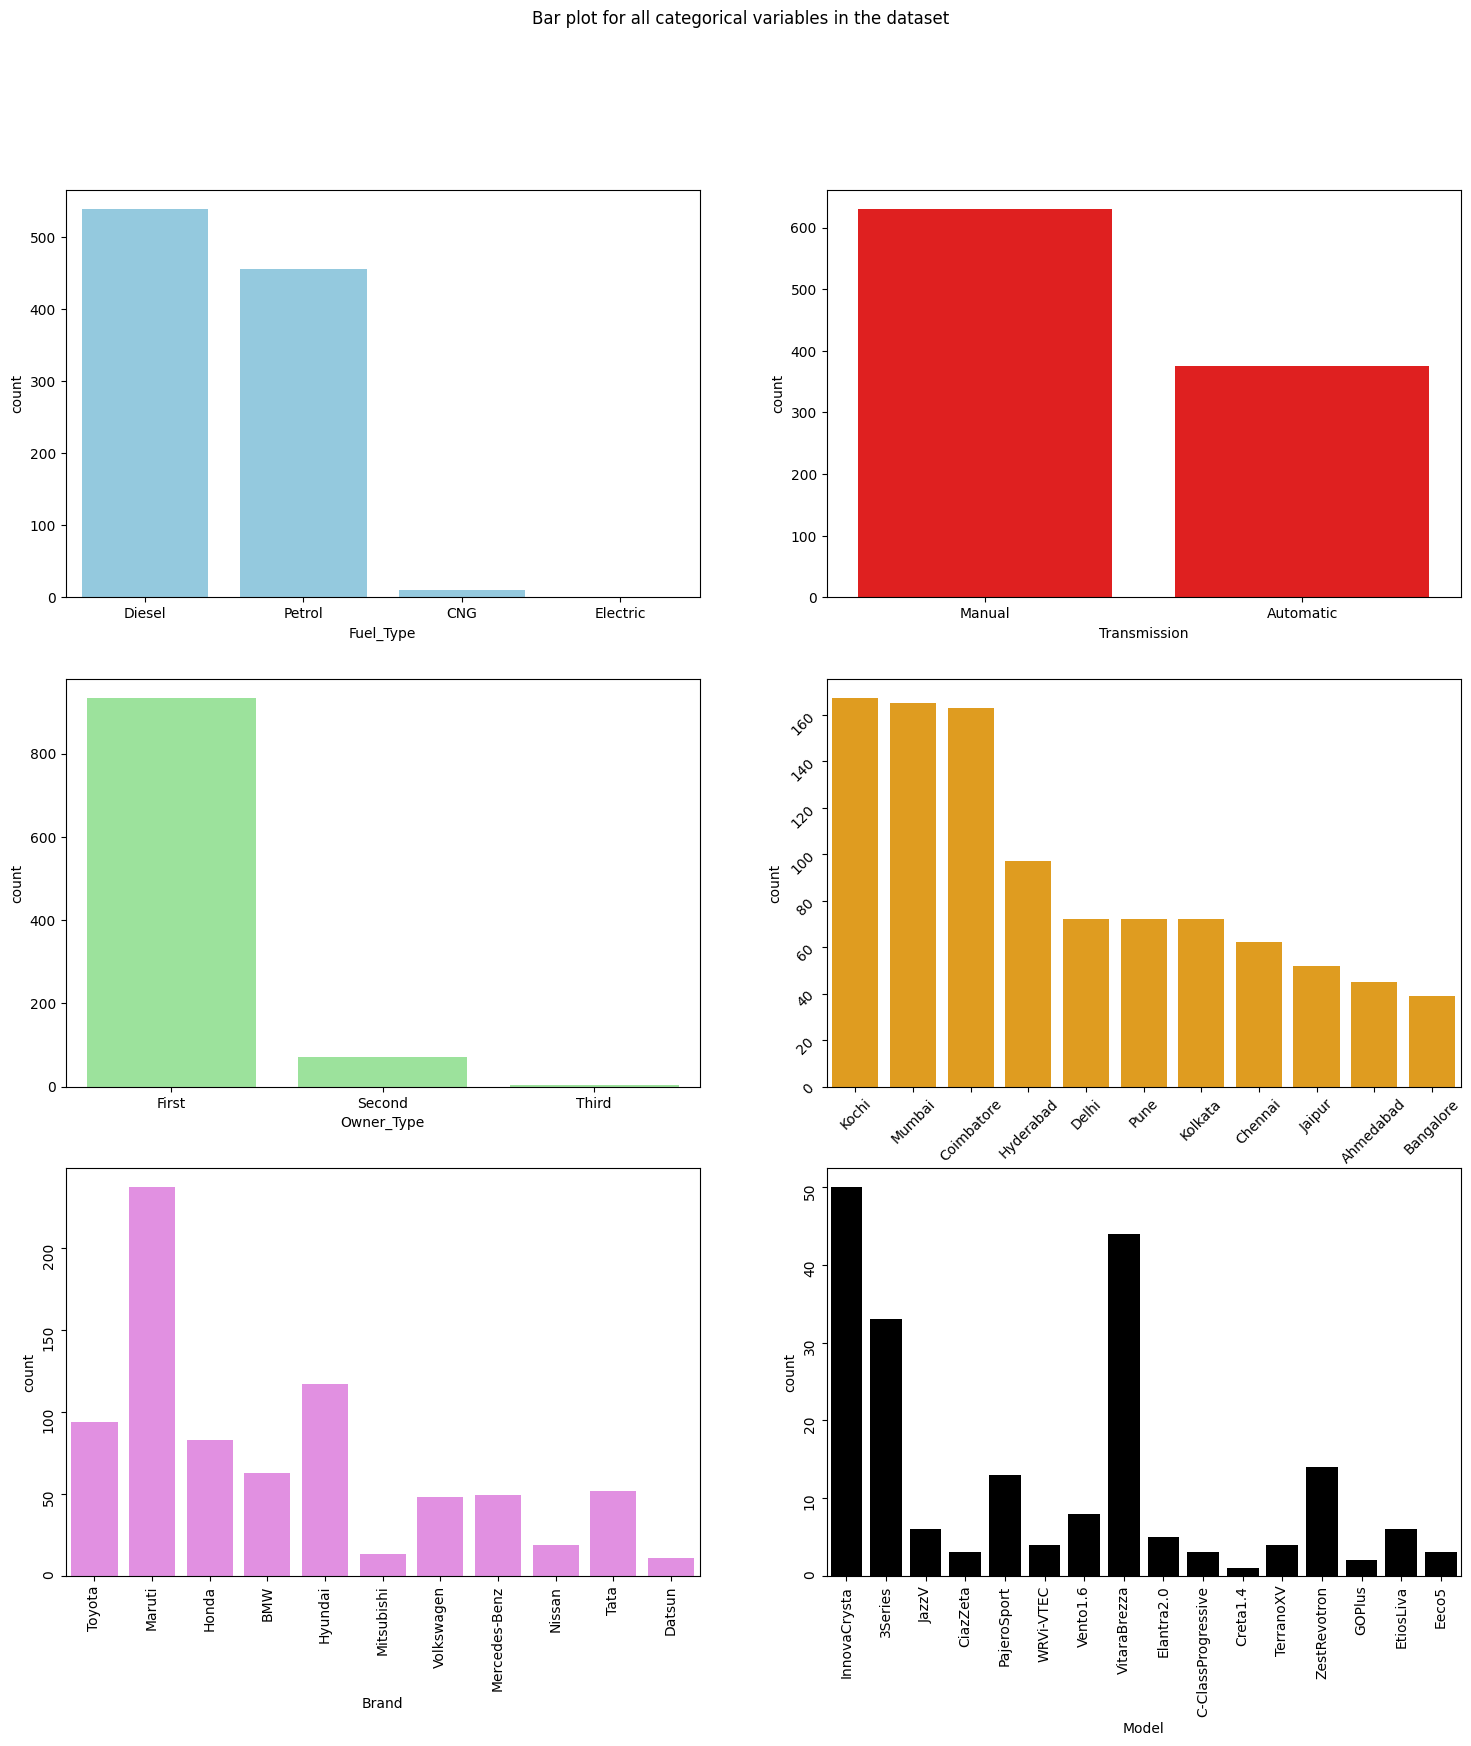

In [185]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0,0], x = 'Fuel_Type', data = data, color = 'skyblue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'red', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'lightgreen', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'orange', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'violet', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'black', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

[['Fuel_Type' 'Transmission']
 ['Owner_Type' 'Engine']
 ['Brand' 'Model']]


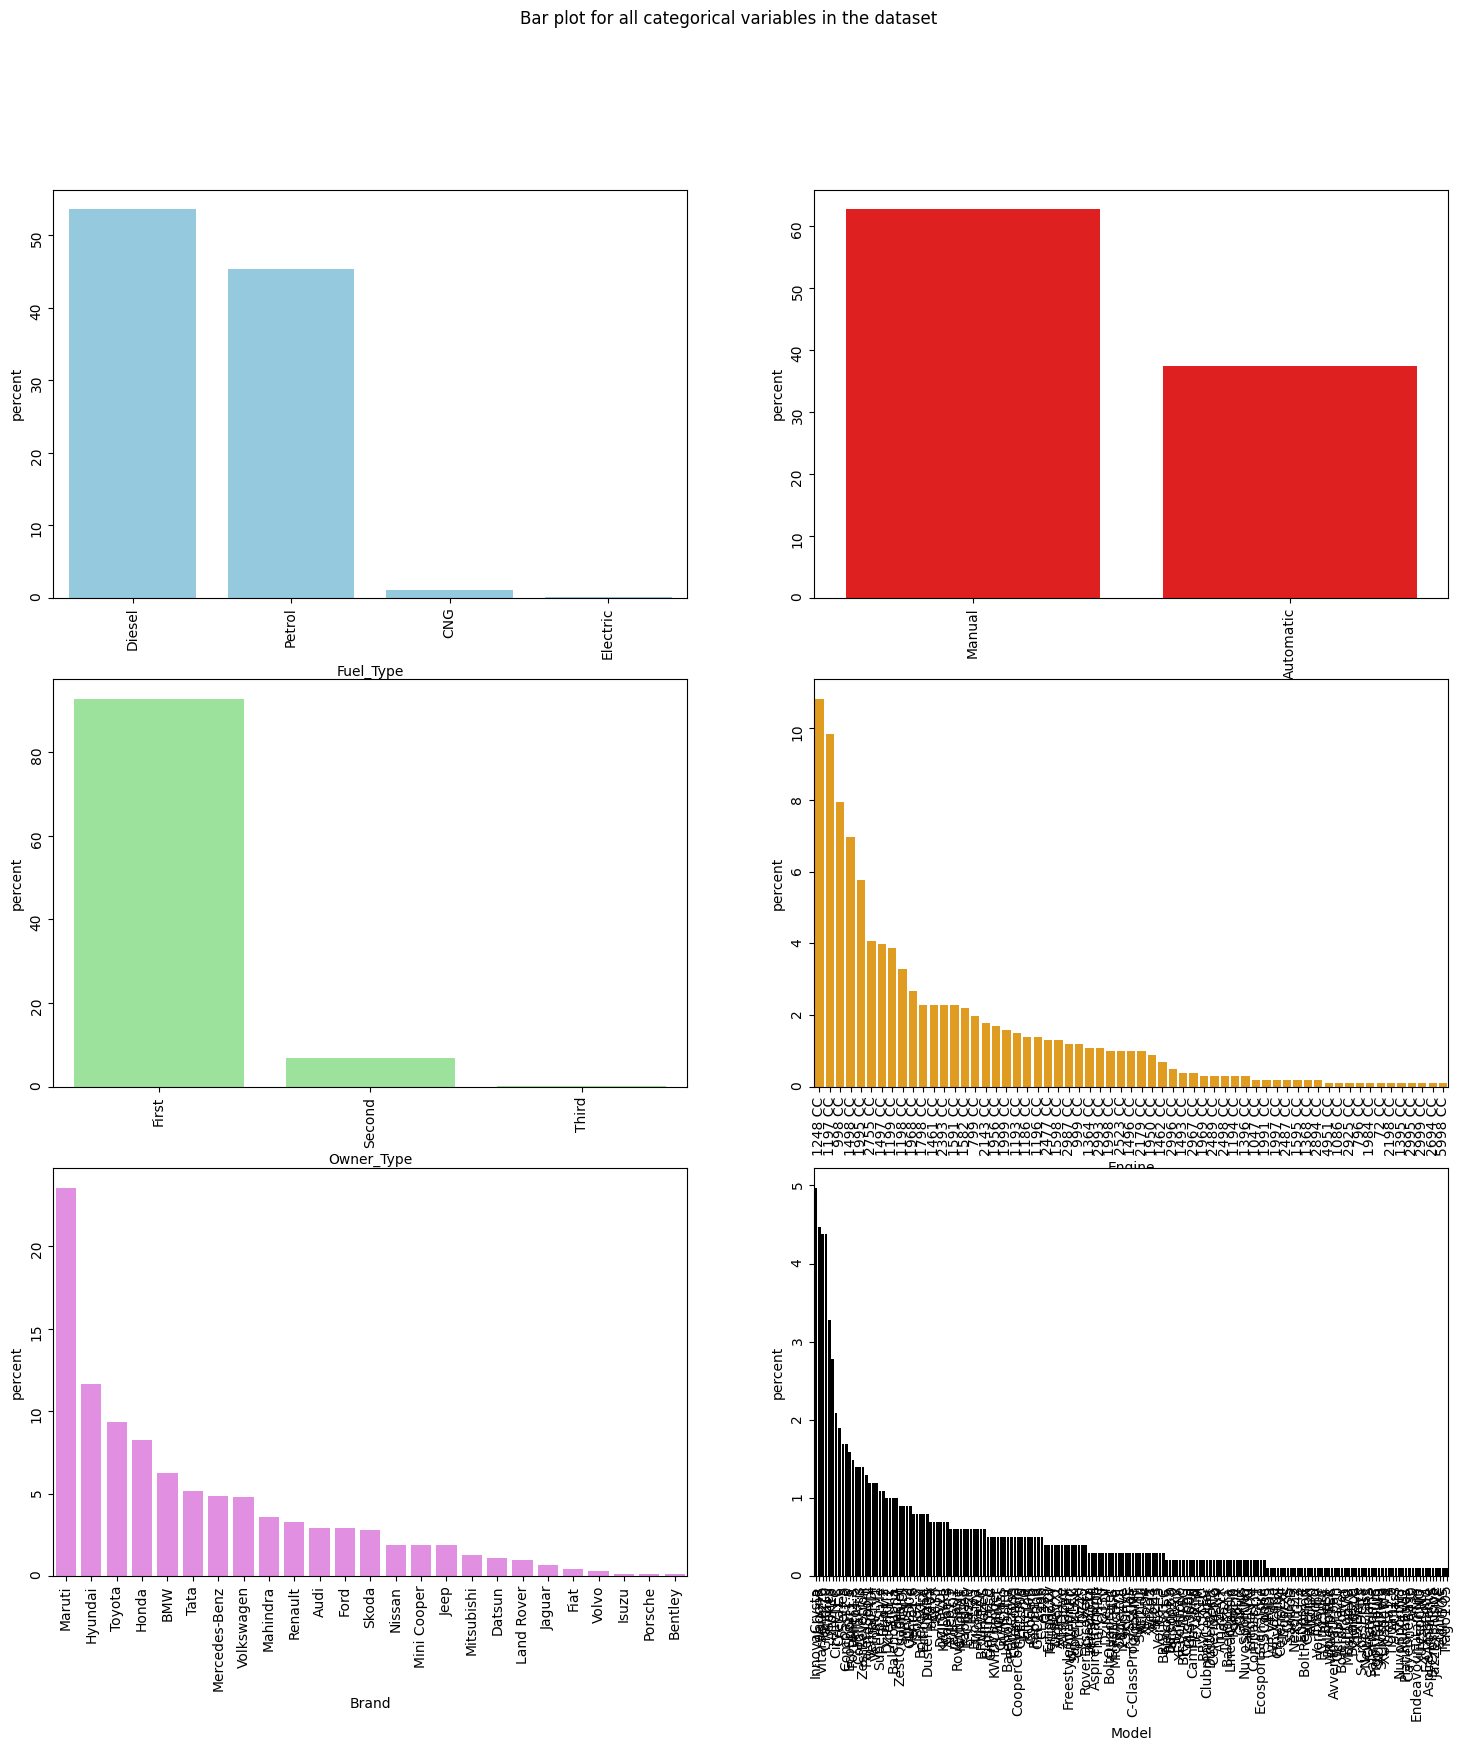

In [186]:
# Convert to percentage graphs 
cat_columns2= np.array(cat_columns).reshape(-1,2)[1:,:]
print(cat_columns2)
colors = np.array([['skyblue','red'],['lightgreen','orange'],['violet','black']])

fig, axes = plt.subplots(3,2,figsize =(18,18))
plt.suptitle('Bar plot for all categorical variables in the dataset')

for i in range(3):
    for j in range(2):
        sns.countplot(ax = axes[i,j], x = cat_columns2[i,j], data= data, order = data[cat_columns2[i,j]].value_counts().index,
                     stat = 'percent', color = colors[i,j])
        # sns.countplot(ax = axes[i,j], x = cat_columns2[i,j], data= data, order = data[cat_columns2[i,j]].head(100).value_counts().index,
        #              stat = 'percent', color = colors[i,j])
        axes[i][j].tick_params(labelrotation = 90)

### 8.3 Observations
- More manual cars were sold. Around 20% more.
- More Marutis are being sold.
- The number of second owner cars sold are very small.
- More cars with the engine 1248CC and 1197CC were sold. Look for issues. 

## 9. Data Transformation

In [187]:
# Turning highly skewed data to log

def log_transform(data,cols):
    for col in cols:
        if (data[col] == 1.0).all():
            data[col+'_log'] = np.log(data[col+1])
        else:
            data[col+'_log'] = np.log(data[col])

In [188]:
log_transform(data,['Price','New_Price','Kilometers_Driven'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2 to 7236
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1006 non-null   object 
 1   Location               1006 non-null   object 
 2   Year                   1006 non-null   int64  
 3   Kilometers_Driven      1006 non-null   int64  
 4   Fuel_Type              1006 non-null   object 
 5   Transmission           1006 non-null   object 
 6   Owner_Type             1006 non-null   object 
 7   Mileage                1005 non-null   float64
 8   Engine                 1006 non-null   object 
 9   Power                  1006 non-null   float64
 10  Seats                  1006 non-null   float64
 11  New_Price              1006 non-null   float64
 12  Price                  824 non-null    float64
 13  Car_Age                1006 non-null   int64  
 14  Brand                  1006 non-null   object 
 15  Model    

/var/folders/69/96gjdgw15hz50s9kv1v9lwsc0000gn/T/ipykernel_7807/1706343118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[0],x=data['Kilometers_Driven_log'], axlabel = 'log(Kilometers driven)')
/var/folders/69/96gjdgw15hz50s9kv1v9lwsc0000gn/T/ipykernel_7807/1706343118.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

<Axes: xlabel='log(New_Price)', ylabel='Density'>

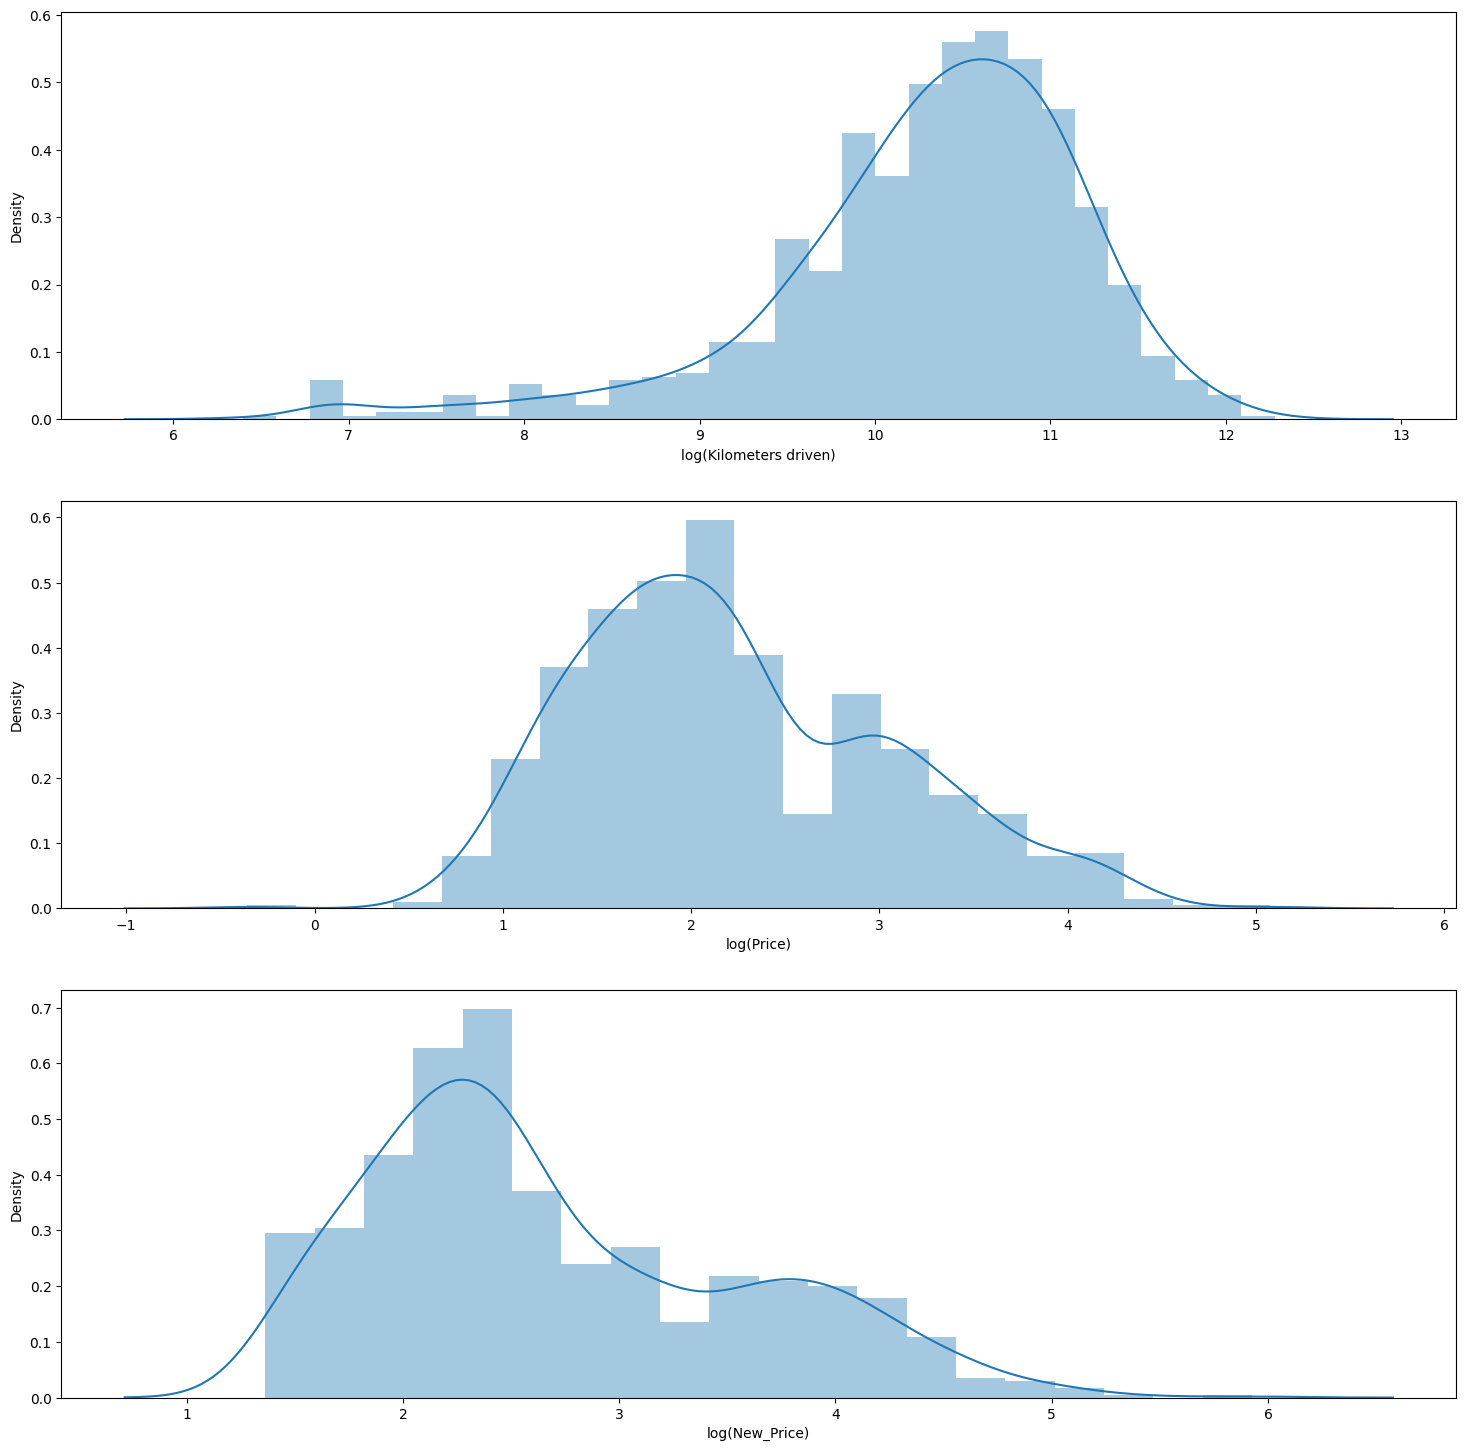

In [189]:
fig,axes = plt.subplots(3,1,figsize=(18,18))
sns.distplot(ax = axes[0],x=data['Kilometers_Driven_log'], axlabel = 'log(Kilometers driven)')
sns.distplot(ax = axes[1], x =data['Price_log'], axlabel = 'log(Price)')
sns.distplot(ax=axes[2], x=data['New_Price_log'], axlabel ='log(New_Price)')

## 10. Bivariate Analysis

### 10.1 Types of plots
1. For numerical variables we can do scatter plots and pair plots
2. For categoriacal variables we can use 
- Bar charts --> if the output variable is a classifier
- Bar plots --> if the output variable is continuous 

### 10.2 Numerical Variables

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x1800 with 0 Axes>

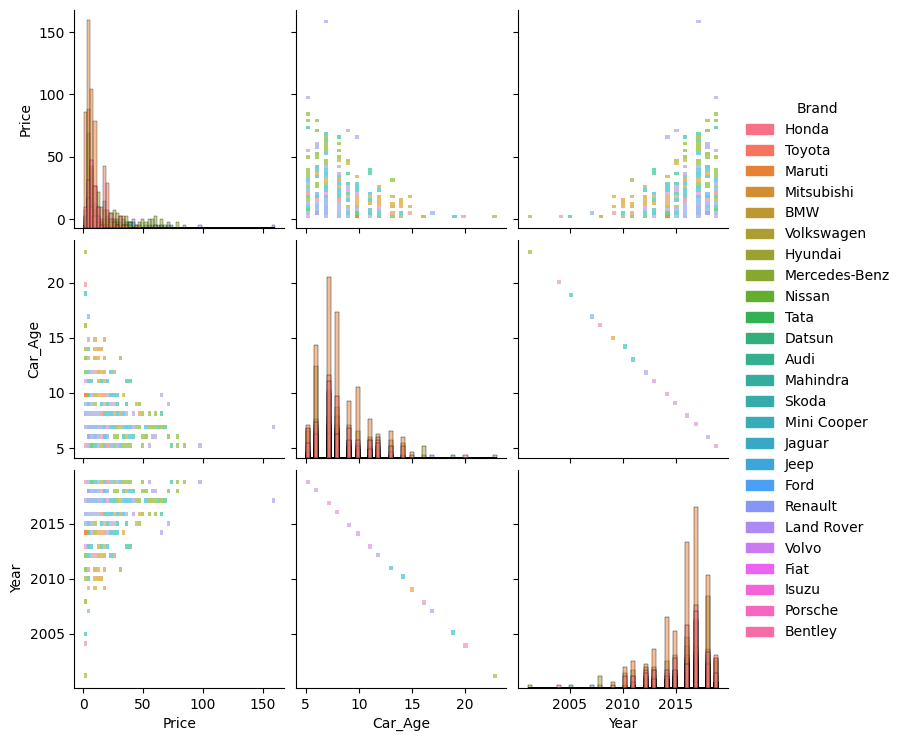

In [190]:
plt.figure(figsize = (18,18))
sns.pairplot(data = data[['Price','Car_Age','Year','Brand']], hue= 'Brand',kind='hist')
plt.show()

### 10.3 Categorical variables

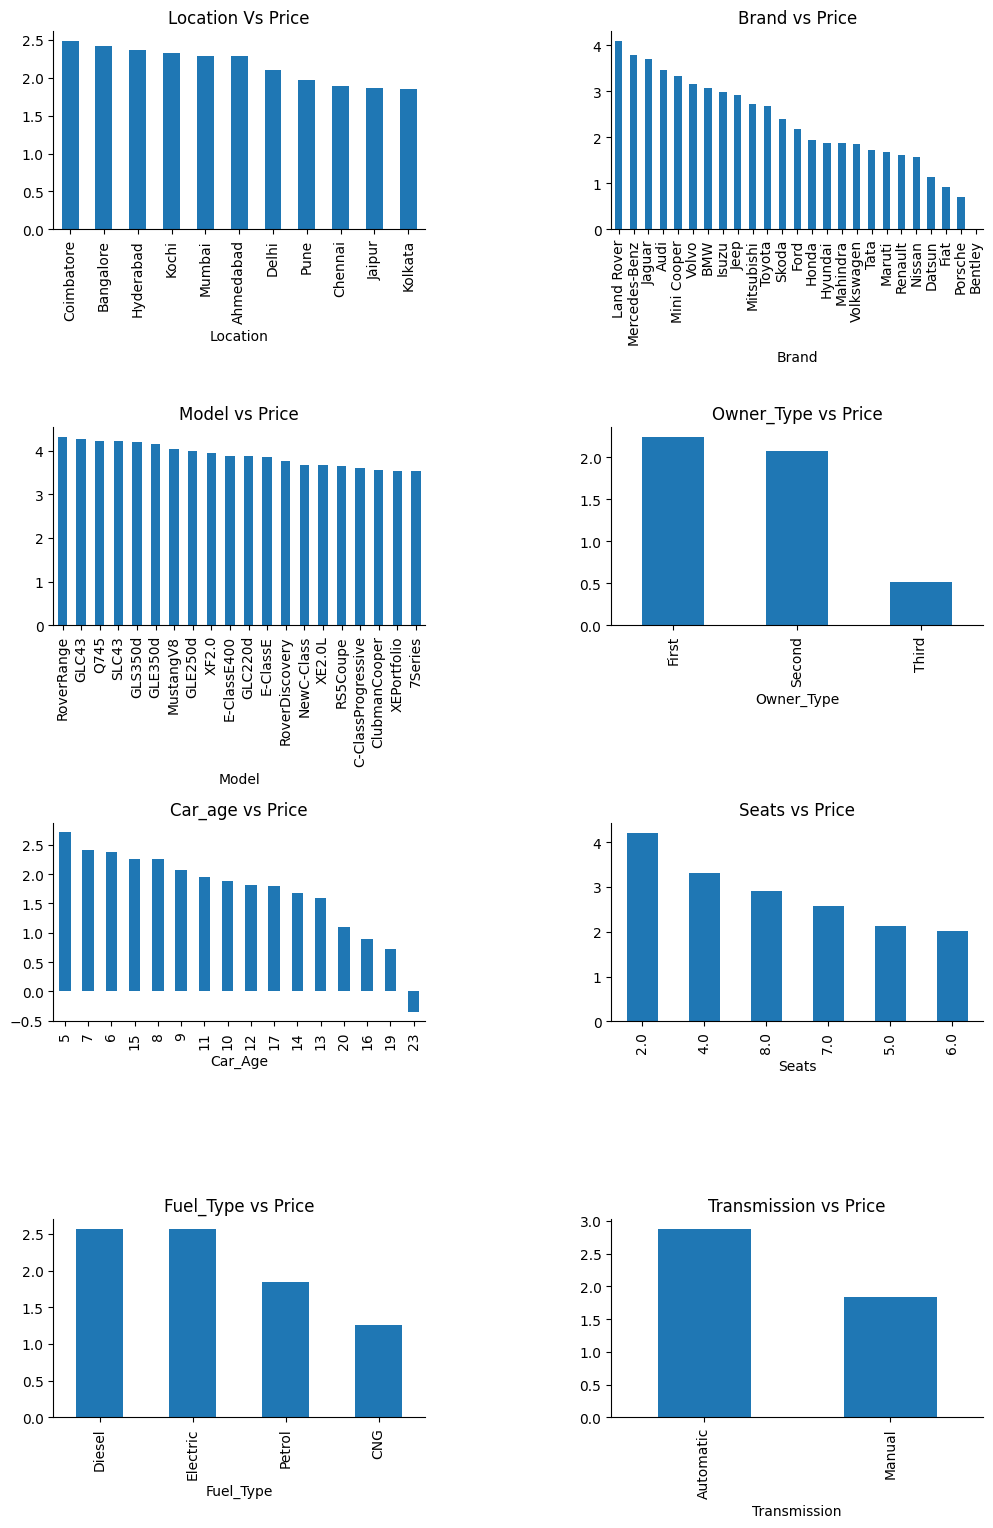

In [191]:
fig , axarr = plt.subplots(4,2, figsize=(12,18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Location Vs Price")

data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Brand vs Price")

data.groupby('Model')['Price_log'].mean().sort_values(ascending=False)[0:20].plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Model vs Price")

data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Owner_Type vs Price")

data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0])
axarr[2][0].set_title("Car_age vs Price")

data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1])
axarr[2][1].set_title("Seats vs Price")

data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0])
axarr[3][0].set_title("Fuel_Type vs Price")

data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1])
axarr[3][1].set_title("Transmission vs Price")

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

##### Observations
- The price is verymuch city dependant and brand dependant
- 2 seaters have the highest price
- Both diesel and electric vehicles have the same price
- Automatic vehicles are higher in prices

## 11. Multivariate Analysis

#### Heat maps are widely used for multivariate studies.
- It provides the correlations between variables
- Can be used for numerical variables

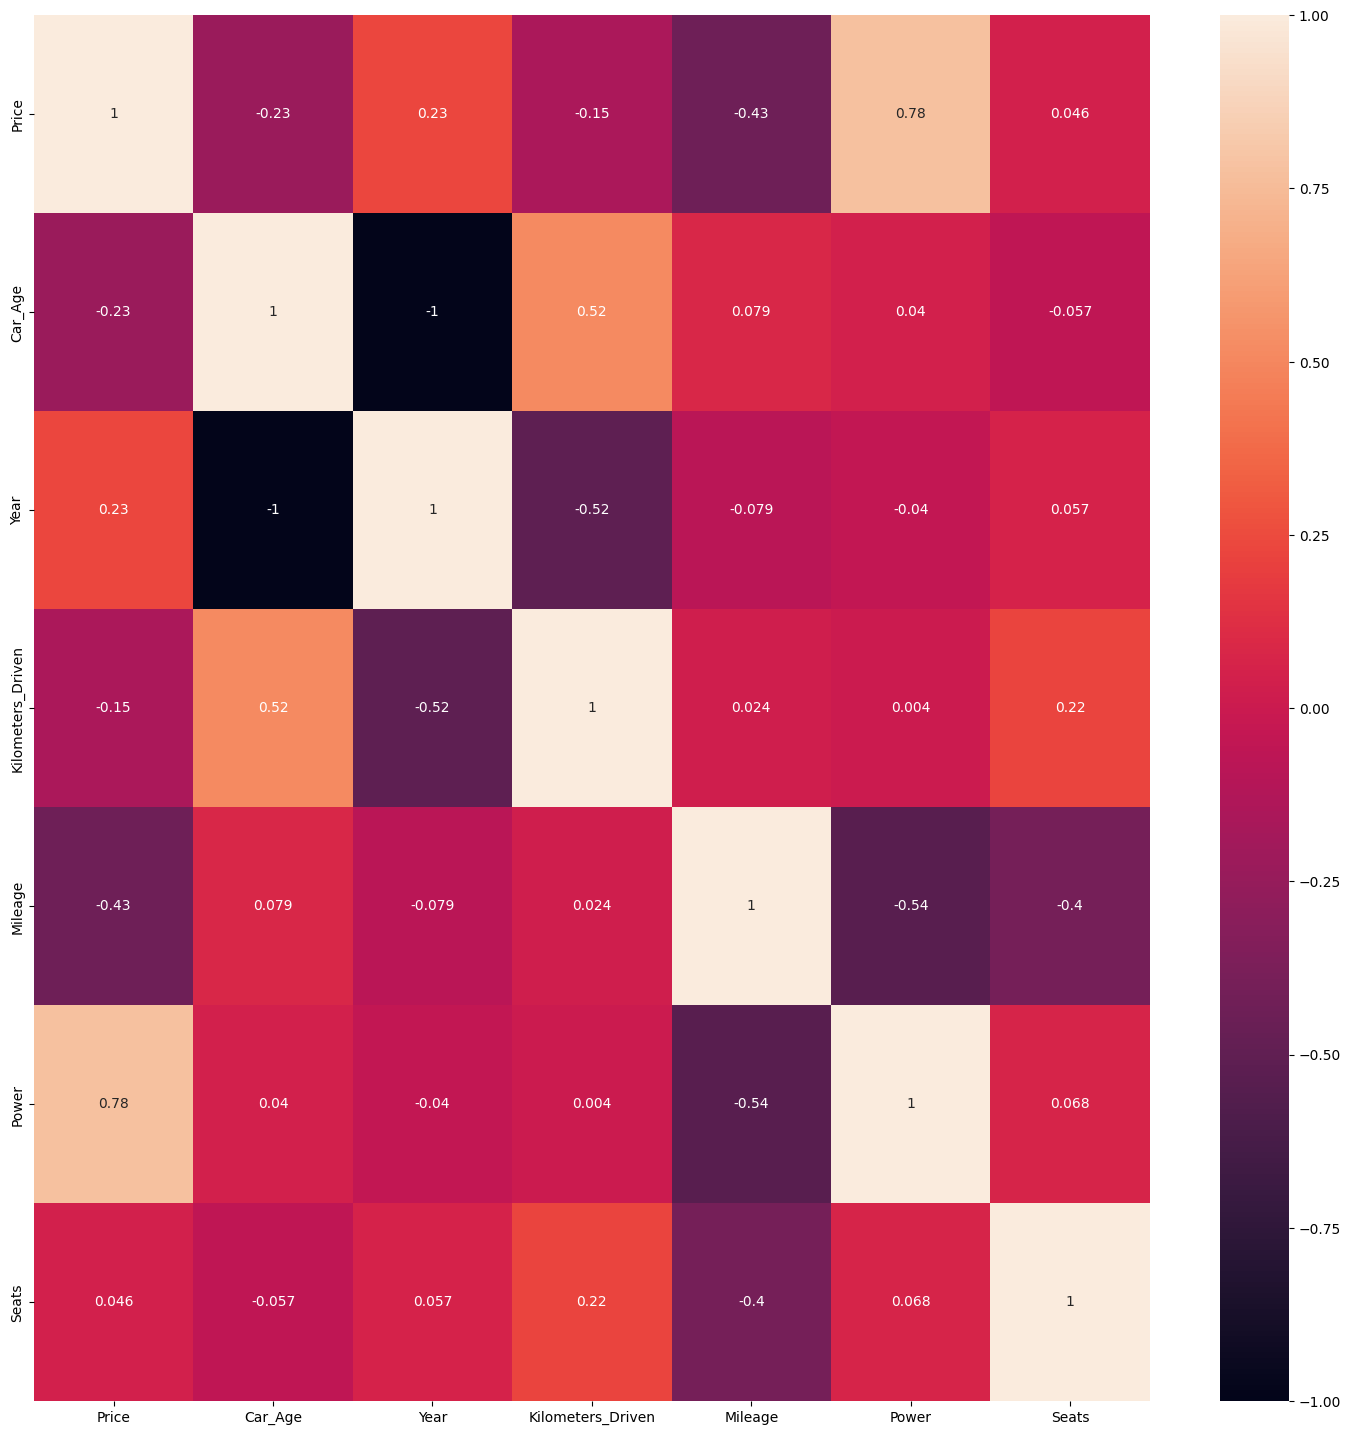

In [192]:
plt.figure(figsize=(18,18))
sns.heatmap(data = data[['Price','Car_Age','Year' ,'Kilometers_Driven', 'Mileage','Power','Seats']].corr(), annot=True, vmin = -1, vmax = 1)
plt.show()

## Impute Missing Values (example)

There are many ways to impute missing values; 
- we can impute the missing values by their Mean, median, most frequent
- we can consider the data and assume ex: car engines, power and number of seats are likely to be the same for each model
- zero values
- use advanced imputation algorithms like KNN, Regularization, etc.

In [193]:
# Imputing the mileage by considering the median of the available values.
data[(data['Mileage'].isna()) |( data['Mileage'] == 0.)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Price_log,New_Price_log,Kilometers_Driven_log
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194.00,5.0,49.14,35.67,5,Mercedes-Benz,C-ClassProgressive,3.574310,3.894673,9.640108
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950 CC,181.43,5.0,49.49,38.99,5,Mercedes-Benz,NewC-Class,3.663305,3.901771,9.487214
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950 CC,194.00,5.0,52.26,39.50,6,Mercedes-Benz,C-ClassProgressive,3.676301,3.956231,9.069007
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41.00,5.0,13.58,13.00,8,Mahindra,EVerito,2.564949,2.608598,10.819778
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950 CC,194.00,5.0,49.14,35.00,5,Mercedes-Benz,C-ClassProgressive,3.555348,3.894673,8.294050


In [194]:
df = data.drop(data[ (data['Mileage'].isna()) | (data['Mileage']==0) ].index)
mileage_median = df['Mileage'].median()
data.loc[(data['Mileage'].isna()) | (data['Mileage']==0.),'Mileage'] = mileage_median

In [195]:
data.Mileage.unique()

array([18.2 , 11.36, 21.56, 13.5 , 22.69, 17.5 , 16.09, 24.3 , 14.62,
       11.25, 13.68, 19.6 , 22.1 , 19.64, 17.57, 19.83, 17.71, 15.1 ,
       19.15, 22.  , 24.07, 19.  , 17.  , 11.05, 21.76, 18.9 , 22.48,
       21.4 , 25.47, 17.45, 27.4 , 14.67, 21.03, 22.5 , 16.82, 17.4 ,
       11.57, 22.95, 18.  , 17.9 , 18.5 , 14.75, 14.45, 19.33, 13.8 ,
       16.  , 15.4 , 17.19, 11.5 , 15.26, 15.96, 25.1 , 15.17, 12.6 ,
       11.  , 15.8 , 20.68, 21.13, 17.1 , 20.14, 21.5 , 20.7 , 14.1 ,
       21.9 , 20.89, 24.  , 23.1 , 25.5 , 14.  , 21.66, 14.02, 25.4 ,
       21.7 , 22.7 , 16.3 , 15.68, 27.39, 27.3 , 25.17, 23.  , 20.64,
       14.24, 18.25, 14.8 , 20.  , 17.6 , 23.84, 19.5 , 27.03, 18.78,
       14.28, 21.43, 13.6 , 14.95, 28.4 , 17.05, 33.54, 12.65, 20.65,
       21.72, 16.55, 26.1 , 12.81, 17.06, 18.16, 17.21, 18.23, 15.5 ,
       12.9 , 16.77, 16.1 , 18.6 , 12.95, 16.5 , 23.59, 25.6 , 19.87,
       17.44, 14.84, 31.79, 18.56, 18.53, 19.69, 18.15, 15.41, 32.26,
       13.33, 17.84,

In [196]:
data.Power.unique()

array([ 88.7 , 171.5 , 103.25, 175.56, 190.  , 103.5 ,  88.5 , 149.92,
       163.7 , 147.8 , 194.  , 108.5 ,  67.  ,  78.9 ,  73.  ,  75.94,
       126.2 ,  67.1 , 362.07, 121.3 , 444.  ,  81.86,  83.1 , 100.  ,
        98.6 , 177.46,  65.  ,  67.04, 189.08, 117.3 , 254.79,  74.  ,
       201.15,  86.8 , 245.  , 227.  , 177.  , 192.  , 246.74, 367.  ,
       187.74,  62.1 , 181.  , 191.34, 258.  , 181.43, 108.4 , 170.  ,
        88.  , 113.98, 154.  ,  81.8 ,  99.6 ,  73.97,  99.  , 155.  ,
       108.62, 118.3 ,  53.64,  53.3 ,  98.96, 174.5 , 160.  , 121.36,
       115.  , 153.86,  84.  , 108.45,  88.76,  75.  , 138.03,  86.79,
        93.7 , 255.  ,  73.75, 105.  , 148.31, 141.  , 122.  , 136.  ,
       261.49,  94.68, 152.88,  67.06,  83.14, 103.52,  83.83,  83.8 ,
        58.33,  86.76, 174.57,  67.05,  82.  ,  58.2 , 340.  , 147.51,
       158.  ,  63.  ,  63.12, 333.  ,  97.6 , 183.  , 175.67,  53.  ,
        41.  , 395.  , 281.61, 150.  ,  68.  , 265.  , 143.  , 152.  ,
      

In [199]:
# For seats, engine and power assuming each unique model has same features we can impute the missing values
data['Power'] = data.groupby(['Brand','Model'])['Power'].transform(lambda x: x.fillna(x.median()))
data['Seats'] = data.groupby(['Brand','Model'])['Seats'].transform(lambda x: x.fillna(x.median()))

## Key Takeaways

1. Identify the duplicates if such duplications are impossible to be part of your data (Data Cleaning)
2. Next scan through unique values which allows you to easily identify outliers and errors (Data Cleaning)
3. Next identify outliers (Data Cleaning)
4. Next impute missing values and erroneous values keeping the effect of outliers in the imputation methods (Data Imputation)
5. Get rid of garbage entries if necessary (Data Cleaning)
6. Filter out the data and features required for your analysis (Data Reduction)
7. Transform the data as necessary (Data Transformation in terms of information(Feature engineering) and data types)
8. EDA --> Uni, Bi, Multivariate analysis
9. Additional Data Transformations for ex: highly skewed data to log
10. If using for ML do not forget Feature Scaling.